In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline 

In [2]:
import pandas as pd
dates=[210710,210717,210724,210731,210807,210814,210821,210828,210904,210911,210918,210925,211002]
df=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210703.txt')
for i in dates:
    temp= pd.read_csv(f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{i}.txt")
    df= pd.concat([df, temp])

df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791


In [3]:
#engine = create_engine("sqlite:///my_database.db")
#df.to_sql('MTAdata',engine,if_exists='replace',index=False )
#all_tables= engine.table_names()
#print(all_tables)

In [4]:
#dd=pd.read_sql('select * from MTAdata limit 10;',engine)
#dd

In [5]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
     format="%m/%d/%Y %H:%M:%S")

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DAY'] = df['DATE'].dt.day_name()

In [8]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-06-26,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00,Saturday


In [9]:
df.sample(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY
130226,R101,R001,02-03-00,SOUTH FERRY,1RW,IRT,2021-08-28,05:00:00,REGULAR,221945,208376,2021-08-28 05:00:00,Saturday
46280,N009,R174,01-00-02,181 ST,A,IND,2021-08-23,17:00:00,REGULAR,1610379045,134768689,2021-08-23 17:00:00,Monday
66188,N108,R217,00-00-02,HOYT-SCHER,ACG,IND,2021-08-26,00:00:00,REGULAR,2595906,2348161,2021-08-26 00:00:00,Thursday
174881,R307,R207,01-00-01,135 ST,23,IRT,2021-08-22,00:00:00,REGULAR,832703,637119,2021-08-22 00:00:00,Sunday
22839,C017,R455,00-00-02,25 ST,R,BMT,2021-07-24,04:00:00,REGULAR,669590,6810245,2021-07-24 04:00:00,Saturday
39434,JFK03,R536,00-00-05,JFK JAMAICA CT1,E,IND,2021-08-27,05:00:00,REGULAR,37521,434657,2021-08-27 05:00:00,Friday
166190,R246,R177,00-00-04,68ST-HUNTER CO,6,IRT,2021-08-12,13:00:00,REGULAR,5449159,3518550,2021-08-12 13:00:00,Thursday
76485,N209,R443,00-00-02,170 ST,BD,IND,2021-07-31,09:00:00,REGULAR,4326008,2323279,2021-07-31 09:00:00,Saturday
151741,R201,R041,00-00-01,BOWLING GREEN,45,IRT,2021-08-02,08:00:00,REGULAR,1691078,942338,2021-08-02 08:00:00,Monday
135859,R121,R290,01-05-00,HOUSTON ST,1,IRT,2021-07-27,01:00:00,REGULAR,319,0,2021-07-27 01:00:00,Tuesday


In [10]:
df.shape

(2934629, 13)

In [11]:
df=df.drop(['LINENAME','DIVISION','TIME','DESC'],axis=1,errors="ignore")
df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DATE_TIME,DAY
0,A002,R051,02-00-00,59 ST,2021-06-26,7592792,2595706,2021-06-26 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,2021-06-26,7592804,2595713,2021-06-26 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,2021-06-26,7592816,2595729,2021-06-26 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,2021-06-26,7592870,2595762,2021-06-26 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,2021-06-26,7592992,2595791,2021-06-26 16:00:00,Saturday


In [12]:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION","DATE_TIME"] )
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)
           

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2911468,S101,R070,00-00-02,ST. GEORGE,2021-09-15 08:00:00,2
2911391,S101,R070,00-00-02,ST. GEORGE,2021-09-02 20:00:00,2
2911401,S101,R070,00-00-02,ST. GEORGE,2021-09-04 12:00:00,2
2911400,S101,R070,00-00-02,ST. GEORGE,2021-09-04 08:00:00,2
2911398,S101,R070,00-00-02,ST. GEORGE,2021-09-04 00:00:00,2


In [13]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION" ,"DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION" ,"DATE_TIME"], inplace=True)
                   

In [14]:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)
           #

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,1
1956336,R139,R031,04-00-01,34 ST-PENN STA,2021-09-01 08:00:00,1
1956316,R139,R031,04-00-01,34 ST-PENN STA,2021-08-29 00:00:00,1
1956317,R139,R031,04-00-01,34 ST-PENN STA,2021-08-29 04:00:00,1
1956318,R139,R031,04-00-01,34 ST-PENN STA,2021-08-29 08:00:00,1


In [15]:
df.shape

(2934482, 9)

In [16]:
#agg
df.groupby('STATION').agg(['sum','max'])

C/A        \
                                                               sum   max   
STATION                                                                    
1 AV             H008H008H008H008H008H008H008H008H008H008H008H0...  H008   
103 ST           R252R252R252R252R252R252R252R252R252R252R252R2...  R252   
103 ST-CORONA    R529R529R529R529R529R529R529R529R529R529R529R5...  R529   
104 ST           N137N137N137N137N137N137N137N137N137N137N137N1...  N137   
110 ST           R254R254R254R254R254R254R254R254R254R254R254R2...  R254   
...                                                            ...   ...   
WOODLAWN         R294R294R294R294R294R294R294R294R294R294R294R2...  R294   
WORLD TRADE CTR  N094N094N094N094N094N094N094N094N094N094N094N0...  N094   
WTC-CORTLANDT    R109R109R109R109R109R109R109R109R109R109R109R1...  R109   
YORK ST          N530N530N530N530N530N530N530N530N530N530N530N5...  N530   
ZEREGA AV        R419R419R419R419R419R419R419R419R419R419R419R4...  R419   

                                                              UNIT        \
                                                               sum   max   
STATION                                                                    
1 AV             R248R248R248R248R248R248R248R248R248R248R248R2...  R248   
103 ST           R180R180R180R180R180R180R180R180R180R180R180R1...  R314   
103 ST-CORONA    R208R208R208R208R208R208R208R208R208R208R208R2...  R208   
104 ST           R354R354R354R354R354R354R354R354R354R354R354R3...  R354   
110 ST           R181R181R181R181R181R181R181R181R181R181R181R1...  R181   
...                                                            ...   ...   
WOODLAWN         R052R052R052R052R052R052R052R052R052R052R052R0...  R052   
WORLD TRADE CTR  R029R029R029R029R029R029R029R029R029R029R029R0...  R029   
WTC-CORTLANDT    R305R305R305R305R305R305R305R305R305R305R305R3...  R305   
YORK ST          R301R301R301R301R301R301R301R301R301R301R301R3...  R301   
ZEREGA AV        R326R326R326R326R326R326R326R326R326R326R326R3...  R326   

                                                               SCP            \
                                                               sum       max   
STATION                                                                        
1 AV             01-00-0401-00-0401-00-0401-00-0401-00-0401-00-...  02-05-01   
103 ST           00-03-0200-03-0200-03-0200-03-0200-03-0200-03-...  00-03-02   
103 ST-CORONA    00-06-0100-06-0100-06-0100-06-0100-06-0100-06-...  00-06-01   
104 ST           00-06-0100-06-0100-06-0100-06-0100-06-0100-06-...  00-06-01   
110 ST           01-00-0201-00-0201-00-0201-00-0201-00-0201-00-...  01-00-02   
...                                                            ...       ...   
WOODLAWN         00-00-0400-00-0400-00-0400-00-0400-00-0400-00-...  00-00-04   
WORLD TRADE CTR  01-06-0301-06-0301-06-0301-06-0301-06-0301-06-...  01-06-03   
WTC-CORTLANDT    03-00-0203-00-0203-00-0203-00-0203-00-0203-00-...  05-03-00   
YORK ST          00-00-0200-00-0200-00-0200-00-0200-00-0200-00-...  00-00-02   
ZEREGA AV        00-05-0100-05-0100-05-0100-05-0100-05-0100-05-...  00-05-01   

                      ENTRIES                      EXITS              \
                          sum         max            sum         max   
STATION                                                                
1 AV             278240854227   370901778   281091705218   388204396   
103 ST            79893955628    26255994    70843745229    44995158   
103 ST-CORONA     38730959242    16585739    39606951706    26408723   
104 ST           994639364028  1681050263   582107311822   978352141   
110 ST            24743585297    14838207    23982099529    13874121   
...                       ...         ...            ...         ...   
WOODLAWN          19617815872     9037031     7563244707     7447752   
WORLD TRADE CTR  938773846602  1580171766  1083251940068  2133796536   
WTC-CORTLANDT    434

In [17]:
df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DATE_TIME,DAY
210210,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,650,2021-10-01 21:00:00,Friday
210209,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 17:00:00,Friday
210208,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 13:00:00,Friday
210207,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 09:00:00,Friday
210206,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 05:00:00,Friday


In [18]:
df['TRAFFIC']= df['ENTRIES']+ df['EXITS']

In [19]:
df.reset_index(inplace=True)

In [20]:
df[["PREV_DATE", "PREV_TRAFFIC"]] = (df
                                     .groupby(["C/A", "UNIT", "SCP", "STATION","DATE"])["DATE_TIME", "TRAFFIC"]
                                    .apply(lambda grp: grp.shift(1)))

<ipython-input-20-2b4aaa5217a5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_TRAFFIC"]] = (df


In [21]:
df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [22]:
(df[df["TRAFFIC"] < df["PREV_TRAFFIC"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION      
A002   R051  02-00-00  59 ST            490
             02-00-01  59 ST            489
             02-03-00  59 ST            489
             02-03-01  59 ST            490
             02-03-02  59 ST            490
                                       ... 
TRAM2  R469  00-00-01  RIT-ROOSEVELT    495
             00-03-00  RIT-ROOSEVELT    424
             00-03-01  RIT-ROOSEVELT    450
             00-05-00  RIT-ROOSEVELT      1
             00-05-01  RIT-ROOSEVELT     25
Length: 4986, dtype: int64

In [23]:
def get_traffic_counts(row, max_counter):
    counter = row["TRAFFIC"] - row["PREV_TRAFFIC"]
    if counter < 0:   
        counter = -counter
    if counter > max_counter: 
        print(row["TRAFFIC"], row["PREV_TRAFFIC"])
        counter = min(row["TRAFFIC"], row["PREV_TRAFFIC"])
    if counter > max_counter:     
        return 0
    return counter
df["DAILY_TRAFFIC"] = df.apply(get_traffic_counts, axis=1, max_counter=100000)


1217208 1401146.0
1400753 1216924.0
1215441 1398948.0
1398937 1215439.0
1215105 1398608.0
1398344 1215006.0
1214681 1398040.0
1397802 1214516.0
1214423 1397715.0
1397225 1214019.0
1213811 1396981.0
1396895 1213756.0
1396198 1213196.0
1213176 1396185.0
2187374764 91.0
8971548 52.0
171275 99.0
184609343 327681.0
2130578 18.0
2914939 458.0
12874932 51.0
3 262243.0
85833085 3604505.0
322383746 3103920210.0
858354 201391185.0
5 2853710385.0
2853710147 5.0
1468 102506.0
3849250 196824.0
1775639362 292.0
22305300 160.0
253510 89.0
19799 393305.0
37 590015.0
2811942 183.0
2620877 654364676.0
107414 393245.0
189534 169.0
190615 52.0
262011 174.0
458872 262144.0
1090520 266.0
103939 334.0
959420 269.0
116701 117.0
6253566 252.0
3751215 83.0
1250033 3319806650.0
25447884 10.0
6016290 25447880.0
3355129 9.0
393607 589900.0
250869 320.0
624552 11.0
1281187 5.0
407792 45.0
473816 91.0
169249 3.0
492787 15.0
310539 16.0
516558 144.0
107382 71.0
190468 113.0
210457 45.0
461630 320.0
107380 44.0
154880

In [24]:
df.head(10)

,index,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DATE_TIME,DAY,TRAFFIC,PREV_DATE,PREV_TRAFFIC,DAILY_TRAFFIC
1,210209,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 17:00:00,Friday,6203,2021-10-01 21:00:00,6204.0,1.0
2,210208,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 13:00:00,Friday,6203,2021-10-01 17:00:00,6203.0,0.0
3,210207,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 09:00:00,Friday,6203,2021-10-01 13:00:00,6203.0,0.0
4,210206,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 05:00:00,Friday,6203,2021-10-01 09:00:00,6203.0,0.0
5,210205,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 01:00:00,Friday,6203,2021-10-01 05:00:00,6203.0,0.0
7,210203,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 17:00:00,Thursday,6203,2021-09-30 21:00:00,6203.0,0.0
8,210202,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 13:00:00,Thursday,6203,2021-09-30 17:00:00,6203.0,0.0
9,210201,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 09:00:00,Thursday,6203,2021-09-30 13:00:00,6203.0,0.0
10,210200,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 05:00:00,Thursday,6203,2021-09-30 09:00:00,6203.0,0.0
11,210199,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 01:00:00,Thursday,6203,2021-09-30 05:00:00,6203.0,0.0


In [25]:
sd = df.groupby(["STATION", "DAY"])[['DAILY_TRAFFIC']].sum().reset_index()
sd.head(5)

,STATION,DAY,DAILY_TRAFFIC
0,1 AV,Friday,291770.0
1,1 AV,Monday,248881.0
2,1 AV,Saturday,237954.0
3,1 AV,Sunday,193855.0
4,1 AV,Thursday,272430.0


In [26]:
station_totals = sd.groupby('STATION').sum()\
    .sort_values('DAILY_TRAFFIC', ascending=False)\
    .reset_index()
x=station_totals.head(5)
x

,STATION,DAILY_TRAFFIC
0,34 ST-PENN STA,9358396.0
1,GRD CNTRL-42 ST,7093095.0
2,34 ST-HERALD SQ,6850849.0
3,14 ST-UNION SQ,6260230.0
4,86 ST,6231245.0


In [27]:
mask=sd[(sd['STATION']=='34 ST-PENN STA') 
        |(sd['STATION']=='GRD CNTRL-42 ST') 
        | (sd['STATION']=='34 ST-HERALD SQ') 
        | (sd['STATION']=='14 ST-UNION SQ') 
        | (sd['STATION']=='86 ST')]
mask_two = mask.groupby(['STATION', 'DAY'])[['DAILY_TRAFFIC']].sum().reset_index()
mask_two.columns

Index(['STATION', 'DAY', 'DAILY_TRAFFIC'], dtype='object')

In [28]:
df.head(10)

,index,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DATE_TIME,DAY,TRAFFIC,PREV_DATE,PREV_TRAFFIC,DAILY_TRAFFIC
1,210209,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 17:00:00,Friday,6203,2021-10-01 21:00:00,6204.0,1.0
2,210208,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 13:00:00,Friday,6203,2021-10-01 17:00:00,6203.0,0.0
3,210207,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 09:00:00,Friday,6203,2021-10-01 13:00:00,6203.0,0.0
4,210206,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 05:00:00,Friday,6203,2021-10-01 09:00:00,6203.0,0.0
5,210205,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 01:00:00,Friday,6203,2021-10-01 05:00:00,6203.0,0.0
7,210203,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 17:00:00,Thursday,6203,2021-09-30 21:00:00,6203.0,0.0
8,210202,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 13:00:00,Thursday,6203,2021-09-30 17:00:00,6203.0,0.0
9,210201,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 09:00:00,Thursday,6203,2021-09-30 13:00:00,6203.0,0.0
10,210200,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 05:00:00,Thursday,6203,2021-09-30 09:00:00,6203.0,0.0
11,210199,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 01:00:00,Thursday,6203,2021-09-30 05:00:00,6203.0,0.0


In [29]:
df.tail(10)

,index,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DATE_TIME,DAY,TRAFFIC,PREV_DATE,PREV_TRAFFIC,DAILY_TRAFFIC
2934471,10,A002,R051,02-00-00,59 ST,2021-06-27,7593330,2595903,2021-06-27 16:00:00,Sunday,10189233,2021-06-27 20:00:00,10189349.0,116.0
2934472,9,A002,R051,02-00-00,59 ST,2021-06-27,7593227,2595880,2021-06-27 12:00:00,Sunday,10189107,2021-06-27 16:00:00,10189233.0,126.0
2934473,8,A002,R051,02-00-00,59 ST,2021-06-27,7593188,2595827,2021-06-27 08:00:00,Sunday,10189015,2021-06-27 12:00:00,10189107.0,92.0
2934474,7,A002,R051,02-00-00,59 ST,2021-06-27,7593182,2595820,2021-06-27 04:00:00,Sunday,10189002,2021-06-27 08:00:00,10189015.0,13.0
2934475,6,A002,R051,02-00-00,59 ST,2021-06-27,7593175,2595818,2021-06-27 00:00:00,Sunday,10188993,2021-06-27 04:00:00,10189002.0,9.0
2934477,4,A002,R051,02-00-00,59 ST,2021-06-26,7592992,2595791,2021-06-26 16:00:00,Saturday,10188783,2021-06-26 20:00:00,10188925.0,142.0
2934478,3,A002,R051,02-00-00,59 ST,2021-06-26,7592870,2595762,2021-06-26 12:00:00,Saturday,10188632,2021-06-26 16:00:00,10188783.0,151.0
2934479,2,A002,R051,02-00-00,59 ST,2021-06-26,7592816,2595729,2021-06-26 08:00:00,Saturday,10188545,2021-06-26 12:00:00,10188632.0,87.0
2934480,1,A002,R051,02-00-00,59 ST,2021-06-26,7592804,2595713,2021-06-26 04:00:00,Saturday,10188517,2021-06-26 08:00:00,10188545.0,28.0
2934481,0,A002,R051,02-00-00,59 ST,2021-06-26,7592792,2595706,2021-06-26 00:00:00,Saturday,10188498,2021-06-26 04:00:00,10188517.0,19.0


In [30]:
df.shape

(2444857, 14)

In [31]:
df.head(10)

,index,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DATE_TIME,DAY,TRAFFIC,PREV_DATE,PREV_TRAFFIC,DAILY_TRAFFIC
1,210209,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 17:00:00,Friday,6203,2021-10-01 21:00:00,6204.0,1.0
2,210208,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 13:00:00,Friday,6203,2021-10-01 17:00:00,6203.0,0.0
3,210207,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 09:00:00,Friday,6203,2021-10-01 13:00:00,6203.0,0.0
4,210206,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 05:00:00,Friday,6203,2021-10-01 09:00:00,6203.0,0.0
5,210205,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-10-01,5554,649,2021-10-01 01:00:00,Friday,6203,2021-10-01 05:00:00,6203.0,0.0
7,210203,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 17:00:00,Thursday,6203,2021-09-30 21:00:00,6203.0,0.0
8,210202,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 13:00:00,Thursday,6203,2021-09-30 17:00:00,6203.0,0.0
9,210201,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 09:00:00,Thursday,6203,2021-09-30 13:00:00,6203.0,0.0
10,210200,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 05:00:00,Thursday,6203,2021-09-30 09:00:00,6203.0,0.0
11,210199,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-30,5554,649,2021-09-30 01:00:00,Thursday,6203,2021-09-30 05:00:00,6203.0,0.0


In [32]:
sdd = sd.groupby(['STATION','DAY']).sum()
sdd.head(20)

DAILY_TRAFFIC
STATION       DAY                     
1 AV          Friday          291770.0
              Monday          248881.0
              Saturday        237954.0
              Sunday          193855.0
              Thursday        272430.0
              Tuesday         271246.0
              Wednesday       280009.0
103 ST        Friday          335606.0
              Monday          305450.0
              Saturday        198873.0
              Sunday          158248.0
              Thursday        324585.0
              Tuesday         339419.0
              Wednesday       344999.0
103 ST-CORONA Friday          289652.0
              Monday          272797.0
              Saturday        217787.0
              Sunday          172169.0
              Thursday        286128.0
              Tuesday         286574.0

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 

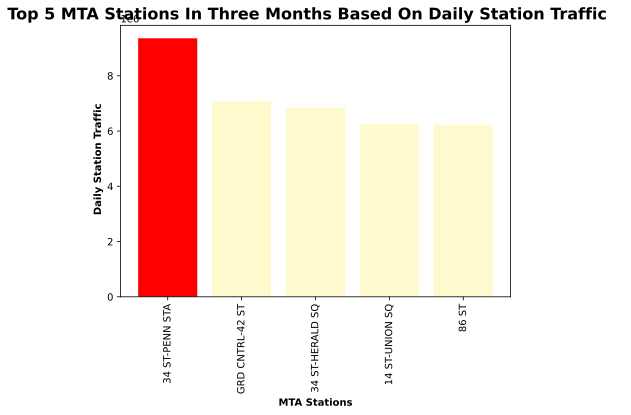

In [107]:
#Station with traffic
fig, ax = plt.subplots(figsize=(7, 5))

ax.bar(x.STATION ,  x.DAILY_TRAFFIC , color=['red','lemonchiffon','lemonchiffon','lemonchiffon',
                               
                                             'lemonchiffon'])
plt.ylabel(' Daily Station Traffic',fontsize=10.0,weight="bold")

plt.xlabel('MTA Stations',fontsize=10.0,weight="bold")
plt.xticks(color= 'black',fontsize=10.0,rotation=90
            )
plt.yticks(color= 'black',fontsize=10.0,rotation=0)
plt.title('Top 5 MTA Stations In Three Months Based On Daily Station Traffic   ',fontsize=16.0, weight="bold")

plt.show()

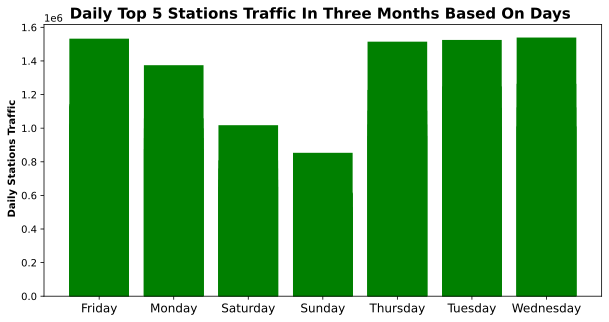

In [130]:
#day with daily traffic for top 5 stations
fig, ax = plt.subplots(figsize=(10, 5))
f = {'fontname':'Helvetica'}
# Create bar plot
ax.bar(mask_two['DAY'],mask_two['DAILY_TRAFFIC'] , color='green')
plt.ylabel(' Daily Stations Traffic',fontsize=10.0,weight="bold")

plt.xlabel('',fontsize=10.0,weight="bold")
plt.xticks(color= 'black',fontsize=12.0,rotation=0)
plt.yticks(color= 'black',fontsize=10.0,rotation=0)
plt.title(' Daily Top 5 Stations Traffic In Three Months Based On Days  ',fontsize=15.0,**f,weight="bold")

plt.show()

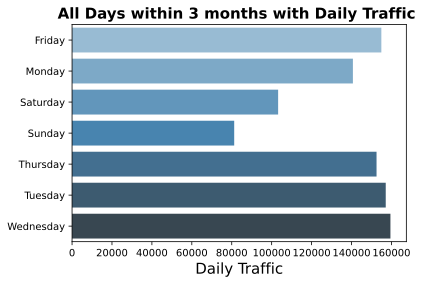

In [128]:
#day with daily traffic seaborn barchart
#day with daily traffic seaborn barchart

ax = sns.barplot(x='DAILY_TRAFFIC', y ='DAY',data=sd, palette='Blues_d', ci = None)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 0);


plt.title('All Days within 3 months with Daily Traffic ', weight='bold',fontsize='15',loc='CENTER')
ax.set_xlabel('Daily Traffic', fontsize = 15)
ax.set_ylabel('', fontsize = 15);


In [ ]:
sns.heatmap(sd.DAILY_TRAFFIC)

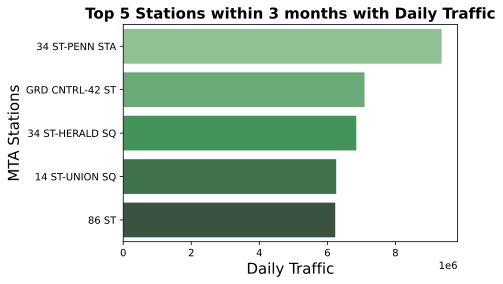

In [100]:
#daily traffic and station
ax = sns.barplot(x='DAILY_TRAFFIC', y='STATION',data=x, palette = 'Greens_d')
ax.set_yticklabels(ax.get_yticklabels(),rotation = 0)
plt.title('Top 5 Stations within 3 months with Daily Traffic', weight='bold',fontsize='15',loc='CENTER')
plt.xlabel('Daily Traffic',fontsize=15)
plt.ylabel('MTA Stations',fontsize=15);

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [58]:
srt=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['DATE']=pd.Categorical(df['DATE'], categories=srt, ordered=True)
df= df.sort_values('DATE')
print(df)

          index    C/A  UNIT       SCP        STATION DATE  ENTRIES    EXITS  \
1        210209  TRAM2  R469  00-05-01  RIT-ROOSEVELT  NaN     5554      649   
2        210208  TRAM2  R469  00-05-01  RIT-ROOSEVELT  NaN     5554      649   
3        210207  TRAM2  R469  00-05-01  RIT-ROOSEVELT  NaN     5554      649   
4        210206  TRAM2  R469  00-05-01  RIT-ROOSEVELT  NaN     5554      649   
5        210205  TRAM2  R469  00-05-01  RIT-ROOSEVELT  NaN     5554      649   
...         ...    ...   ...       ...            ...  ...      ...      ...   
2934477       4   A002  R051  02-00-00          59 ST  NaN  7592992  2595791   
2934478       3   A002  R051  02-00-00          59 ST  NaN  7592870  2595762   
2934479       2   A002  R051  02-00-00          59 ST  NaN  7592816  2595729   
2934480       1   A002  R051  02-00-00          59 ST  NaN  7592804  2595713   
2934481       0   A002  R051  02-00-00          59 ST  NaN  7592792  2595706   

                  DATE_TIME       DAY  

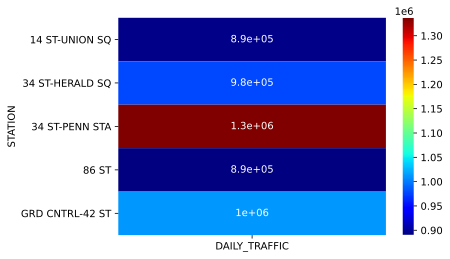

In [93]:
import numpy as np
from sklearn import datasets
%config InlineBackend.figure_format = 'svg'
avrg = mask_two.groupby(by = ['STATION']).mean()

avrg
sns.heatmap(avrg,cmap='jet',annot=True);

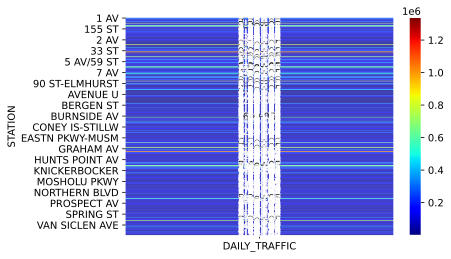

In [94]:
import numpy as np
from sklearn import datasets
%config InlineBackend.figure_format = 'svg'
avrg = sdd.groupby(by = ['STATION']).mean()

avrg
sns.heatmap(avrg,cmap='jet',annot=True);

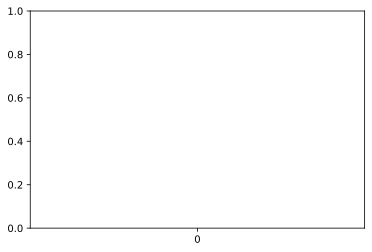

In [96]:
sns.boxplot(df=df
           );